import seaborn as sns
from sklearn.model_selection import train_test_split
# ^^^ pyforest auto-imports - don't write above this line
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
This is a simple linear regression task as it involves just two variables.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np 
import pyforest
import matplotlib.pyplot as plt  
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
%matplotlib inline

In [2]:
#Loading the dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking the linearity of the data

<IPython.core.display.Javascript object>

C:\Users\umerb\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


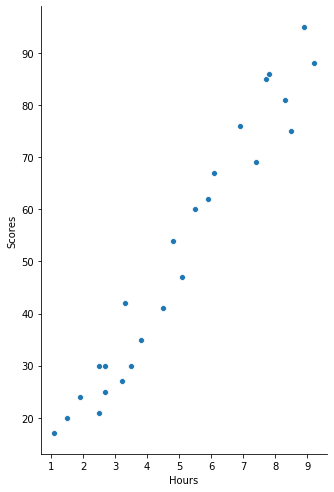

In [5]:
# Visualising the relationship between the features and the DEPENDENT variable using scatterplots
sns.pairplot(data, x_vars="Hours", y_vars="Scores",size=7, aspect=0.7, kind='scatter')

# Checking the distribution of the data

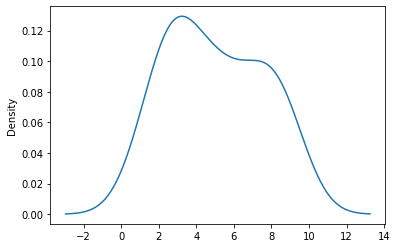

In [6]:
#Indepndent Variable
data.Hours.plot(kind='density')

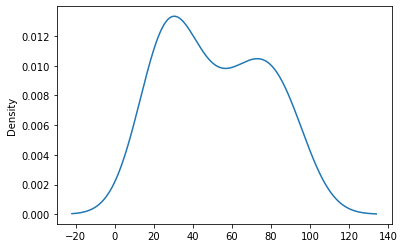

In [7]:
#Depndent Variable
data.Scores.plot(kind='density')

# Univariate Analysis using Box plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

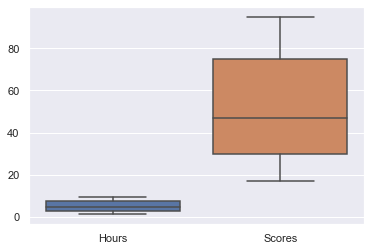

In [8]:
sns.set()
sns.boxplot(data=data)

# Bivariate analysis using Bar plot

<IPython.core.display.Javascript object>

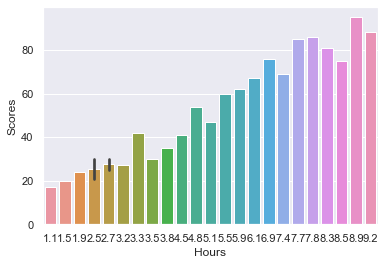

In [9]:
sns.barplot(x="Hours",y="Scores",data=data)   

# Describing the dependent and independent variable

In [10]:
X = data.iloc[:, :-1].values  #Independent = Hours
y = data.iloc[:, 1].values    #Dependent = Scores

In [11]:
print(f"Size of X: {X.shape}")
print(f"Size of y: {y.shape}")

Size of X: (25, 1)
Size of y: (25,)


# Spliting the data into train and test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<IPython.core.display.Javascript object>

(17, 1)
(8, 1)
(17,)
(8,)


# ==>Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#Predicting the Test set Result
y_pred = regressor.predict(X_test)

# Model Evaluation

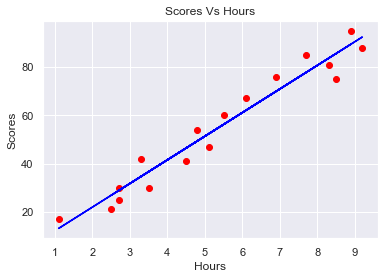

In [15]:
#For Training data
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Scores Vs Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

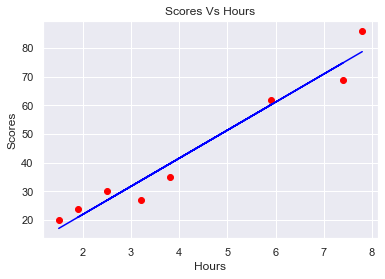

In [16]:
#For Testing Data
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Scores Vs Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [17]:
print(f"MAE of the Linear Regression model is {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE of the Linear Regression model is {mean_squared_error(y_test, y_pred)}")

MAE of the Linear Regression model is 4.419727808027652
MSE of the Linear Regression model is 22.96509721270043


In [18]:
#Now compare the actual output values for Test set with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359


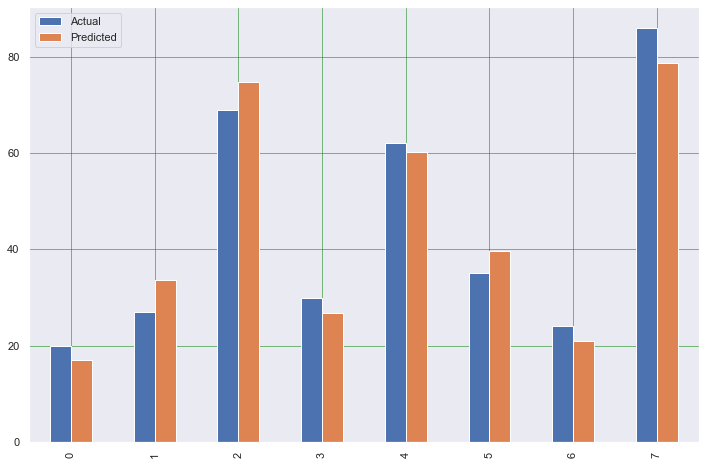

In [19]:
df1 = df
df1.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [20]:
#Whatwill be predicted score if a student study for 9.25 hrs in a day?
print(f"Predicted score if a student study for 9.25 hours is: {regressor.predict([[9.25]])}")

Predicted score if a student study for 9.25 hours is: [92.91505723]


# Conclusion

# Predicted score if a student study for 9.25 hours is 92.92 using simple linear regression model.
# And with Mean Absolute Error of 4.42